# Histograms

*Imports and data_folder access*

In [151]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [152]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [153]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441406_fiano\\20230331\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\metrics.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\parameters.yml',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\trial_data.csv']

In [154]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441406_fiano/20230331')

In [155]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


*Trial Matrix*

In [156]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [157]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [158]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

0: 1259
1: 2354
2: 2101
3: 2097
4: 2223
5: 2177
6: 2201
7: 2053
8: 2149
9: 2149
10: 2251
11: 2098
12: 2152
13: 2205
14: 2246
15: 2450
16: 2447
17: 2204
18: 2349
19: 2390
20: 2449
21: 2551
22: 2306
23: 2297
24: 2505
25: 2498


# Goal 2: position of mice during events, normalized position, histogram of positions of whole session
1. extract the position timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
2. normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
3. concatenate all trial positions together compute the histogram of positions across the whole session
4. numpy histogram function

This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

# Histogram: edges & centers
- Edges: The edges represent the boundaries of each bin in the histogram. These boundaries determine the range of data values that are included in each bin. By default, the edges are defined so that each bin has the same width, but you can also specify custom bin sizes if needed.
- Centers: The centers represent the midpoint of each bin in the histogram. They are commonly used to label the x-axis of the histogram, and can provide additional insight into the distribution of the data.

<BarContainer object of 10 artists>

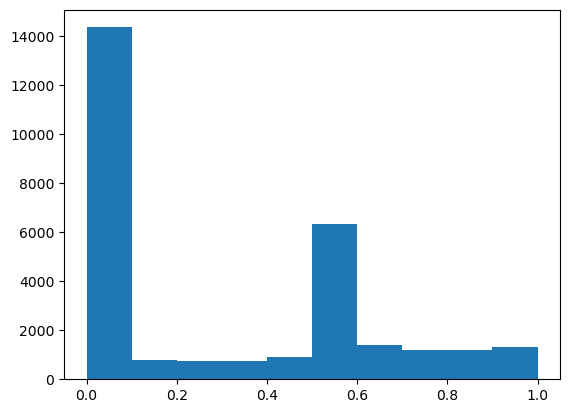

In [159]:
values,edges = np.histogram(pos_list[0])
centers = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)]

plt.bar(centers,values,width=0.1)

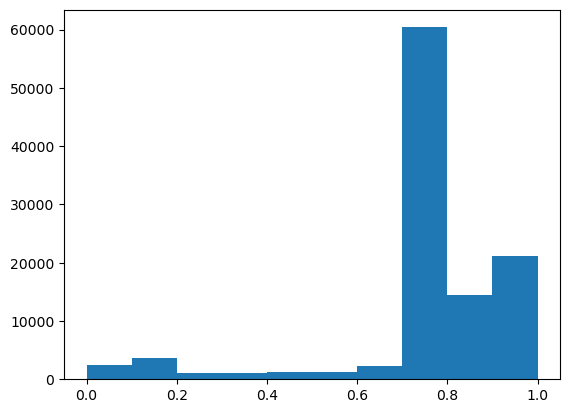

In [160]:
plt.hist(pos_list[5]);

# Plotting events with normalised position
goal 1:
- isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
- use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)
- This will tell us if there is a change in licking patterns during the course of the trial

see session_outlook.ipynb for the plot

goal 2:
- extract the poistion timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
- normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
- concatenate all trial positions together compute the histogram of positions across the whole session
This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

In [161]:
import sys
sys.path.append('../src') # Add src folder to path.

import histogram_analysis as ha # Import my analysis functions from /src.

In [162]:
#plt.figure(figsize=(10,5))
#plt.plot(norm_pos)

In [163]:
# Insight into what the behavioural data contains.
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (1707552,)
position with shape: (1707552,)
lick_onsets with shape: (1515,)
lick_offsets with shape: (1515,)
reward_onsets with shape: (26,)
reward_offsets with shape: (26,)


In [164]:
#b_data['lick_offsets'][:-1]-b_data['lick_onsets']

# Position histogram with events
Verticle lines: reward zone onset, tunnel1 onset, sound onset.

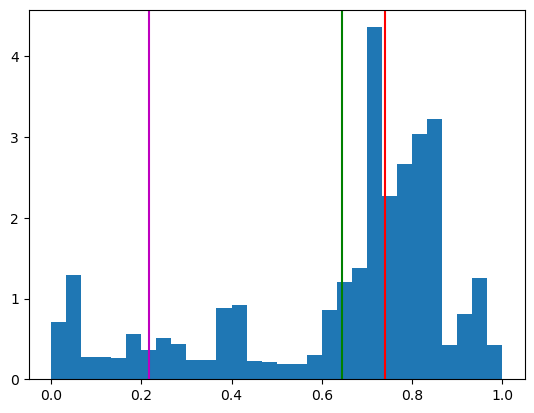

In [165]:
save_folder = output_folder = Path('./imgs') 
# Calling the histogram with the function.
ha.position_event_histogram(b_data, trial_data, selected_data_session, save_folder)